In [1]:
!pip install xgboost

In [2]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.pipeline import Pipeline as ImPipeline
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay, recall_score, accuracy_score, precision_score, f1_score
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from numpy import array 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1, L2
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline

In [3]:
#importing the data
df = pd.read_csv('../data/data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
#examining data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
#checking summary statistics for each column 
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
#checking target class balance
df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [7]:
#gonna need to smote the data in some way

In [8]:
#making sure I know the dtype of my target
df['Bankrupt?'].dtype == 'int64'

True

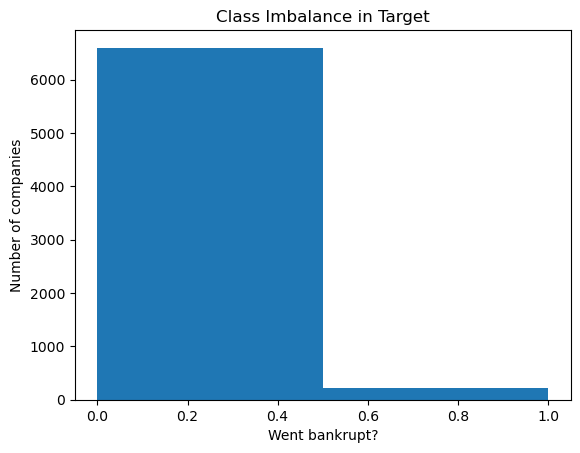

In [9]:
#making visualization of class imbalance for presentation
fig, ax = plt.subplots()
ax.hist(df['Bankrupt?'], bins = 2)
ax.set_title('Class Imbalance in Target')
ax.set_xlabel('Went bankrupt?')
ax.set_ylabel('Number of companies')
plt.show()

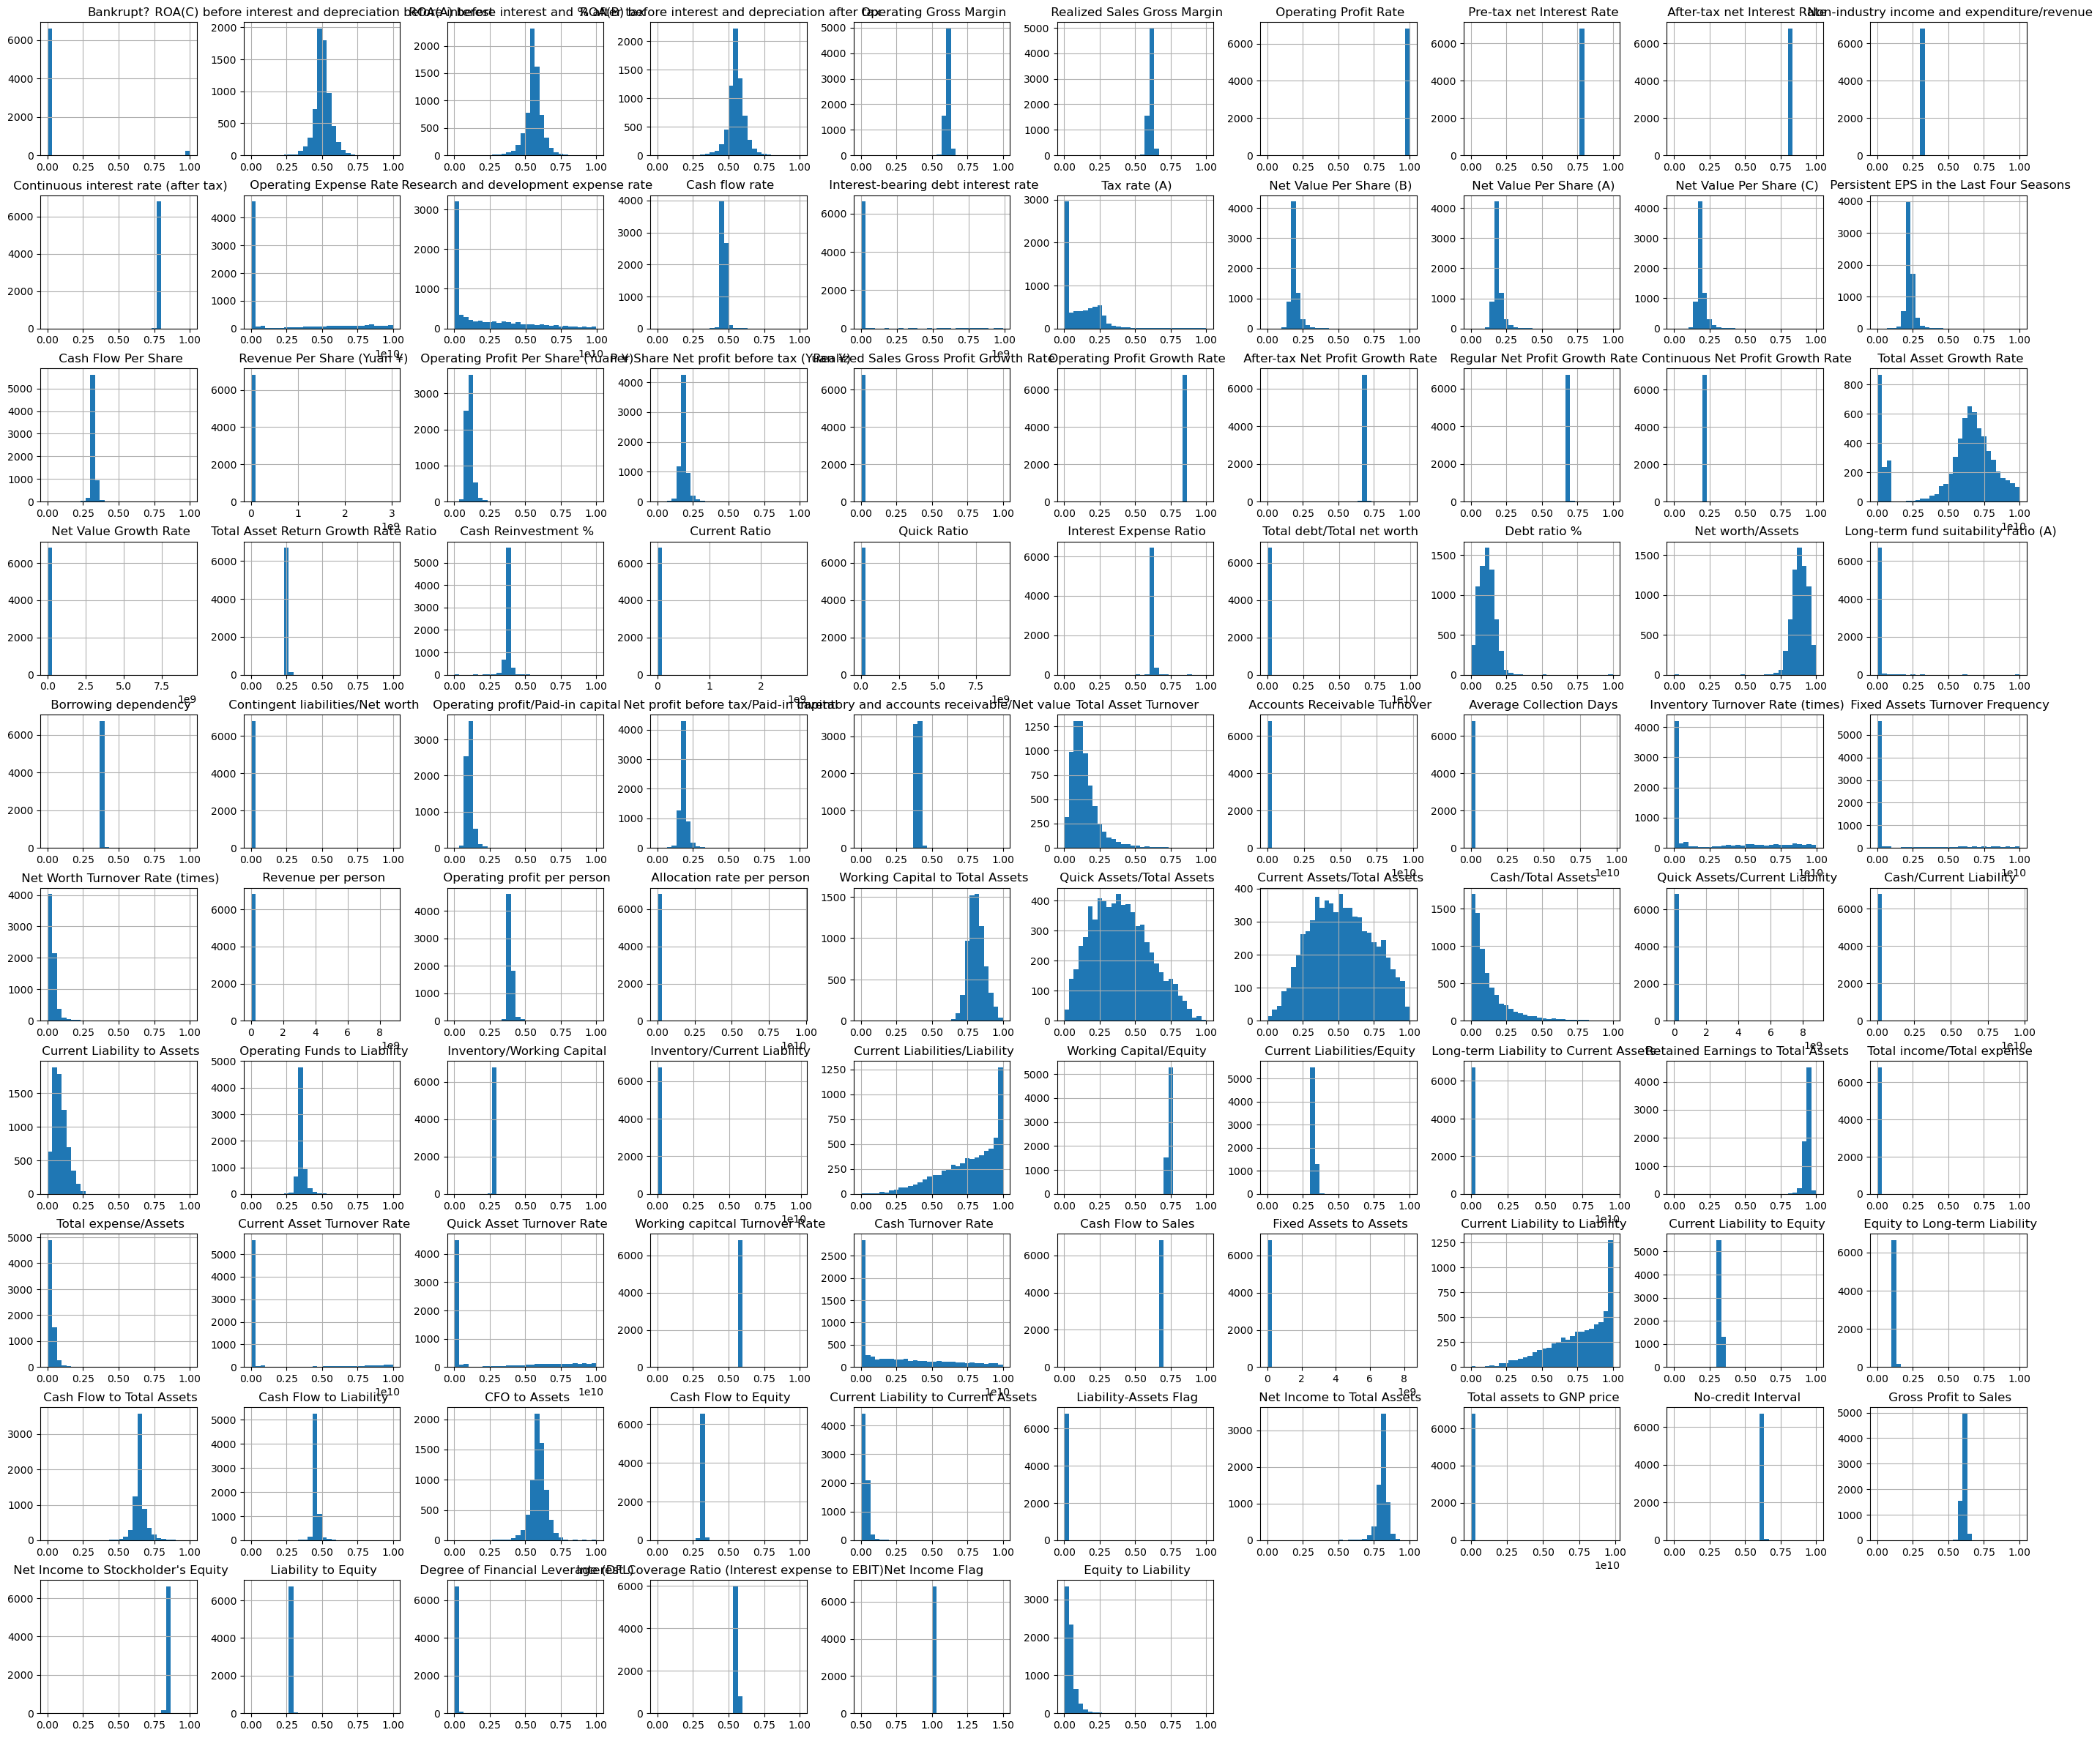

In [10]:
#checking how features are distributed
df.hist(figsize = (35,30),bins = 30)
plt.show()

In [11]:
#before making any models I have to do a few things 
#1: get rid of outliars
#2: cut down on the amount of features I have
#3: smote the data so that I have a large enough sample

In [12]:
#first step is I need to remove outliers

In [13]:
#removing outliers with the standard 1.5*iqr at 1st and 3rd quartile formula, also put in code to check how many outliers were present
def remove_outliers(feature,feature_name,data):
    
    q1, q3 = np.percentile(feature, 25), np.percentile(feature, 75)
    iqr = q3 - q1
    print('iqr: {}'.format(iqr))
    
    feat_cut_off = iqr * 1.5
    feat_lower, feat_upper = q1 - feat_cut_off, q3 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))

    data = data.drop(data[(data[feature_name] > feat_upper) | (data[feature_name] < feat_lower)].index)
    print('*' * 80)
    
    return data

for col in df:
    df_no_outliers = remove_outliers(df[col],str(col),df)

iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
********************************************************************************
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
 ROA(C) before interest and depreciation before interest Lower: 0.38797348023204903
 ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
********************************************************************************
iqr: 0.05361426079372
Cut Off: 0.08042139119058
 ROA(A) before interest and % after tax Lower: 0.45512156563454
 ROA(A) before interest and % after tax Upper: 0.66957860880942
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
********************************************************************************
iqr: 0.05682852401092098
Cut Off: 0.08524278601638147
 ROA

In [14]:
#I want this to fail only uncomment to make sure, making sure that outliers were actually removed 
# assert df_no_outliers != df

In [15]:
#checking the data again
df_no_outliers.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [16]:
#changing the name for brevity later
df = df_no_outliers

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6270 entries, 0 to 6817
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6270 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6270 non-null   float64
 2    ROA(A) before interest and % after tax                   6270 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6270 non-null   float64
 4    Operating Gross Margin                                   6270 non-null   float64
 5    Realized Sales Gross Margin                              6270 non-null   float64
 6    Operating Profit Rate                                    6270 non-null   float64
 7    Pre-tax net Interest Rate                                6270 non-null   float64
 8    After-tax net Interest

In [18]:
#using borderline smote because I want to be able to differentiate between noise points and borderline points
from imblearn.over_sampling import BorderlineSMOTE
#making train test split
X = df.drop(columns = 'Bankrupt?')
y = df['Bankrupt?']

In [19]:
#using standard scaler becasue I will be using log transform to make the high skew features more normal
scaler = StandardScaler()

In [20]:
#performing log transformation on high skew features
def log_trans(data):
    
    for col in data:
        skew = data[col].skew()
        if skew > 0.5 or skew < -0.5:
            data[col] = np.log1p(data[col])
        else:
            continue
            
    return data

X_adjusted = log_trans(X)

In [21]:
#making a split for feature reduction
X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(X_adjusted, y, test_size = .3, random_state = 42, stratify = y)

In [22]:
#transforming data to primary components, seeing how many components actually explain variance
scaler = StandardScaler()
base_pca = PCA(n_components= 44)
smote = BorderlineSMOTE(k_neighbors = 5, random_state=42)
X_tr_stand = scaler.fit_transform(X_train_pre)
X_tr_smote, y_tr_smote = smote.fit_resample(X_tr_stand, y_train_pre)
X_tr_pca = base_pca.fit_transform(X_tr_smote)
X_test_pca = base_pca.transform(X_test_pre)

/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [23]:
#making a dataframe out of the primary components
pca_trans_df = pd.DataFrame(X_tr_pca)
pca_trans_df

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-2.110136,-0.858779,-1.618456,-0.569846,0.331774,0.082548,0.904565,0.137326,-0.431044,-1.547748,...,0.087793,0.054253,0.149383,0.211955,0.529426,-0.288276,0.238037,-0.175674,0.519173,0.081356
1,-0.456615,-0.121349,0.886309,-0.286655,-1.492926,0.101726,0.793895,0.982002,-0.573313,0.106657,...,0.872211,-0.076598,0.365273,0.424530,-0.422204,-0.600495,-0.062679,0.185361,0.194963,-0.752659
2,-6.033942,-9.286045,0.744102,2.359175,-0.715811,3.154907,-0.366098,2.677314,2.581333,4.397297,...,0.434288,-1.408598,-0.125647,0.290079,1.993996,-0.431849,1.218212,0.120924,-2.190777,1.033253
3,1.967787,1.682000,-1.893090,-2.490463,2.150430,-7.419454,1.546222,5.471086,-1.609779,0.658281,...,-0.618400,-0.412252,-0.624885,-0.432247,0.026281,0.240857,-0.187363,0.263336,-1.674527,0.224578
4,-2.806384,-3.222933,-1.001266,0.510779,0.164642,-0.464112,-0.867304,-0.351074,-0.207549,1.023284,...,0.208090,0.092503,0.087520,0.058047,-0.173909,0.118643,-0.033240,-0.215383,0.170262,-0.079204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8467,4.265560,4.231276,-1.039753,-0.750968,0.072878,-1.114578,1.363113,-0.742198,-0.646308,-1.049977,...,-0.254089,0.113900,0.123238,0.249031,0.103797,-0.038161,-0.022400,-0.141326,0.551636,0.276194
8468,2.758637,6.268427,-3.169059,-3.034499,1.183833,-1.259311,2.086883,-0.289437,-1.000855,1.122560,...,-0.465539,0.012497,-0.164625,-0.081840,-0.153663,0.194174,-0.383270,0.290899,-0.189346,-0.032081
8469,3.670288,3.007490,6.755828,-1.972224,8.457106,-0.299558,0.819424,1.589146,-0.839079,0.041738,...,0.514590,-0.096249,-0.011758,-0.079738,-0.195524,0.154882,0.155760,-0.305816,-0.078803,-0.467849
8470,-0.523336,0.005853,0.202248,0.414409,-0.710593,0.095474,-2.192487,-4.880892,0.049911,2.469478,...,-0.113925,0.146701,-0.061174,-0.015091,0.335146,0.181349,-0.042474,0.008686,-0.299665,0.548662


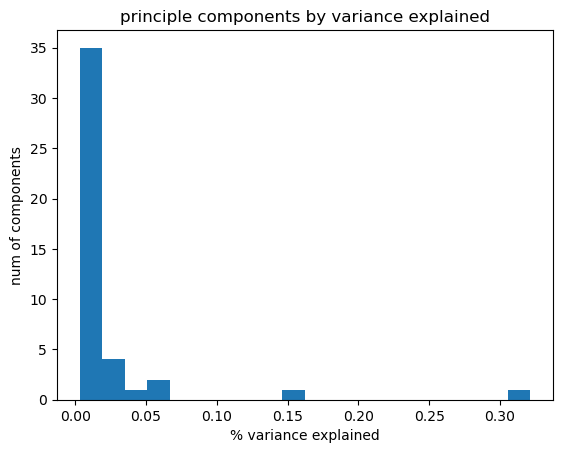

In [24]:
#visualizing primary components by explained variance
pca_df = pd.DataFrame(base_pca.explained_variance_ratio_)
fig, ax = plt.subplots()
ax.hist(pca_df, bins = 20)
ax.set_title('principle components by variance explained')
ax.set_xlabel('% variance explained')
ax.set_ylabel('num of components')
plt.show()

In [25]:
#gonna trim down features and make a new set of primary components because a lot of these will be useless

In [26]:
#performing rfecv feature selection to narrow down features, a lot of these will be correlated and/or useless for modeling
min_features_to_select = 1 
clf = LogisticRegression(max_iter = 1000)
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="recall",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_adjusted, y)

print(f"Optimal number of features: {rfecv.n_features_}")

/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

Optimal number of features: 66


In [27]:
#obtaining which features are the best, only going to use best features so only using 44 not the 66 that was intially suggested
clf = LogisticRegression(max_iter = 10000)
select = RFECV(estimator=clf, cv=5)
select = select.fit(X_adjusted, y)
 
print("Feature ranking: ", select.ranking_)

Feature ranking:  [ 1  1  1  1  2 24 38  3 26 49 52 45 10 41  1  1  1  1  1  6  1  1  1 22
 46 31 36 30 23  7 32  1  1 29 27  1  1  1 19  1 14  1  1 18  1  1  5 51
 28 40  1  1 21  1  1  1  1  1 17  1  4 35 39  9  1  1 50 34 42  1 43 47
 15 37 11  1  1  1  1  8 25  1 12  1 16  1 20 33  1  1  1 13 48 44  1]


In [28]:
#obtaining the names of the best features
mask = select.get_support()
arr = df.to_numpy()
features = array(X_adjusted.columns) 
best_features = features[mask]
 
print("All features: ", X_adjusted.shape[1])
print(features)

print("Selected best: ", best_features.shape[0])
print(features[mask]) 

All features:  95
[' ROA(C) before interest and depreciation before interest'
 ' ROA(A) before interest and % after tax'
 ' ROA(B) before interest and depreciation after tax'
 ' Operating Gross Margin' ' Realized Sales Gross Margin'
 ' Operating Profit Rate' ' Pre-tax net Interest Rate'
 ' After-tax net Interest Rate'
 ' Non-industry income and expenditure/revenue'
 ' Continuous interest rate (after tax)' ' Operating Expense Rate'
 ' Research and development expense rate' ' Cash flow rate'
 ' Interest-bearing debt interest rate' ' Tax rate (A)'
 ' Net Value Per Share (B)' ' Net Value Per Share (A)'
 ' Net Value Per Share (C)' ' Persistent EPS in the Last Four Seasons'
 ' Cash Flow Per Share' ' Revenue Per Share (Yuan ¥)'
 ' Operating Profit Per Share (Yuan ¥)'
 ' Per Share Net profit before tax (Yuan ¥)'
 ' Realized Sales Gross Profit Growth Rate'
 ' Operating Profit Growth Rate' ' After-tax Net Profit Growth Rate'
 ' Regular Net Profit Growth Rate' ' Continuous Net Profit Growth Rate'

In [29]:
#making list of features that were not in the best features
feat_to_drop = [feat for feat in features if feat not in features[mask]]

In [30]:
#dropping suboptimal features
X_reduced = X_adjusted.drop(columns = feat_to_drop)
X_reduced

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Revenue Per Share (Yuan ¥),...,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,CFO to Assets,Current Liability to Current Assets,Net Income to Total Assets,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Equity to Liability
0,0.370594,0.353743,0.340571,0.470914,0.000000,0.137978,0.137978,0.137978,0.156269,0.017407,...,0.516571,0.291981,0.119159,0.520382,0.111765,0.540489,0.470912,0.603162,0.254799,0.016335
1,0.464291,0.430622,0.416557,0.476380,0.000000,0.167420,0.167420,0.167420,0.189747,0.020924,...,0.268949,0.284984,0.114146,0.567101,0.046669,0.585171,0.476381,0.609749,0.249860,0.020581
2,0.426071,0.404811,0.386822,0.470909,0.000000,0.163742,0.163742,0.177069,0.166006,0.005926,...,0.368820,0.288764,0.111472,0.538491,0.025031,0.573614,0.470909,0.608011,0.254788,0.016340
3,0.399844,0.372435,0.376883,0.459664,0.000000,0.143396,0.143396,0.143396,0.177076,0.014266,...,0.479860,0.286313,0.114007,0.604105,0.065085,0.553629,0.459661,0.606879,0.248204,0.023699
4,0.465022,0.430764,0.420221,0.469243,0.000000,0.154867,0.154867,0.154867,0.192715,0.029258,...,0.680572,0.285725,0.105200,0.578469,0.046622,0.585014,0.469242,0.609751,0.245698,0.034875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6812,0.491639,0.437931,0.430403,0.478231,0.260673,0.156490,0.156490,0.156490,0.197770,0.023749,...,0.669238,0.283937,0.105205,0.569432,0.022467,0.591526,0.478232,0.610133,0.244169,0.059922
6813,0.477600,0.426004,0.422715,0.467393,0.000000,0.166065,0.166065,0.166065,0.193338,0.023970,...,0.471303,0.286004,0.107787,0.587200,0.046936,0.584463,0.467392,0.609692,0.247895,0.024500
6814,0.493687,0.431437,0.433878,0.472784,0.107393,0.161307,0.161307,0.161307,0.196062,0.020554,...,0.580476,0.285866,0.106719,0.587178,0.027567,0.587746,0.472784,0.609961,0.246552,0.029452
6815,0.475162,0.430658,0.421451,0.468945,0.315975,0.166636,0.166636,0.166636,0.196139,0.022788,...,0.615131,0.284993,0.106456,0.569498,0.030985,0.587647,0.468944,0.609932,0.245400,0.037569


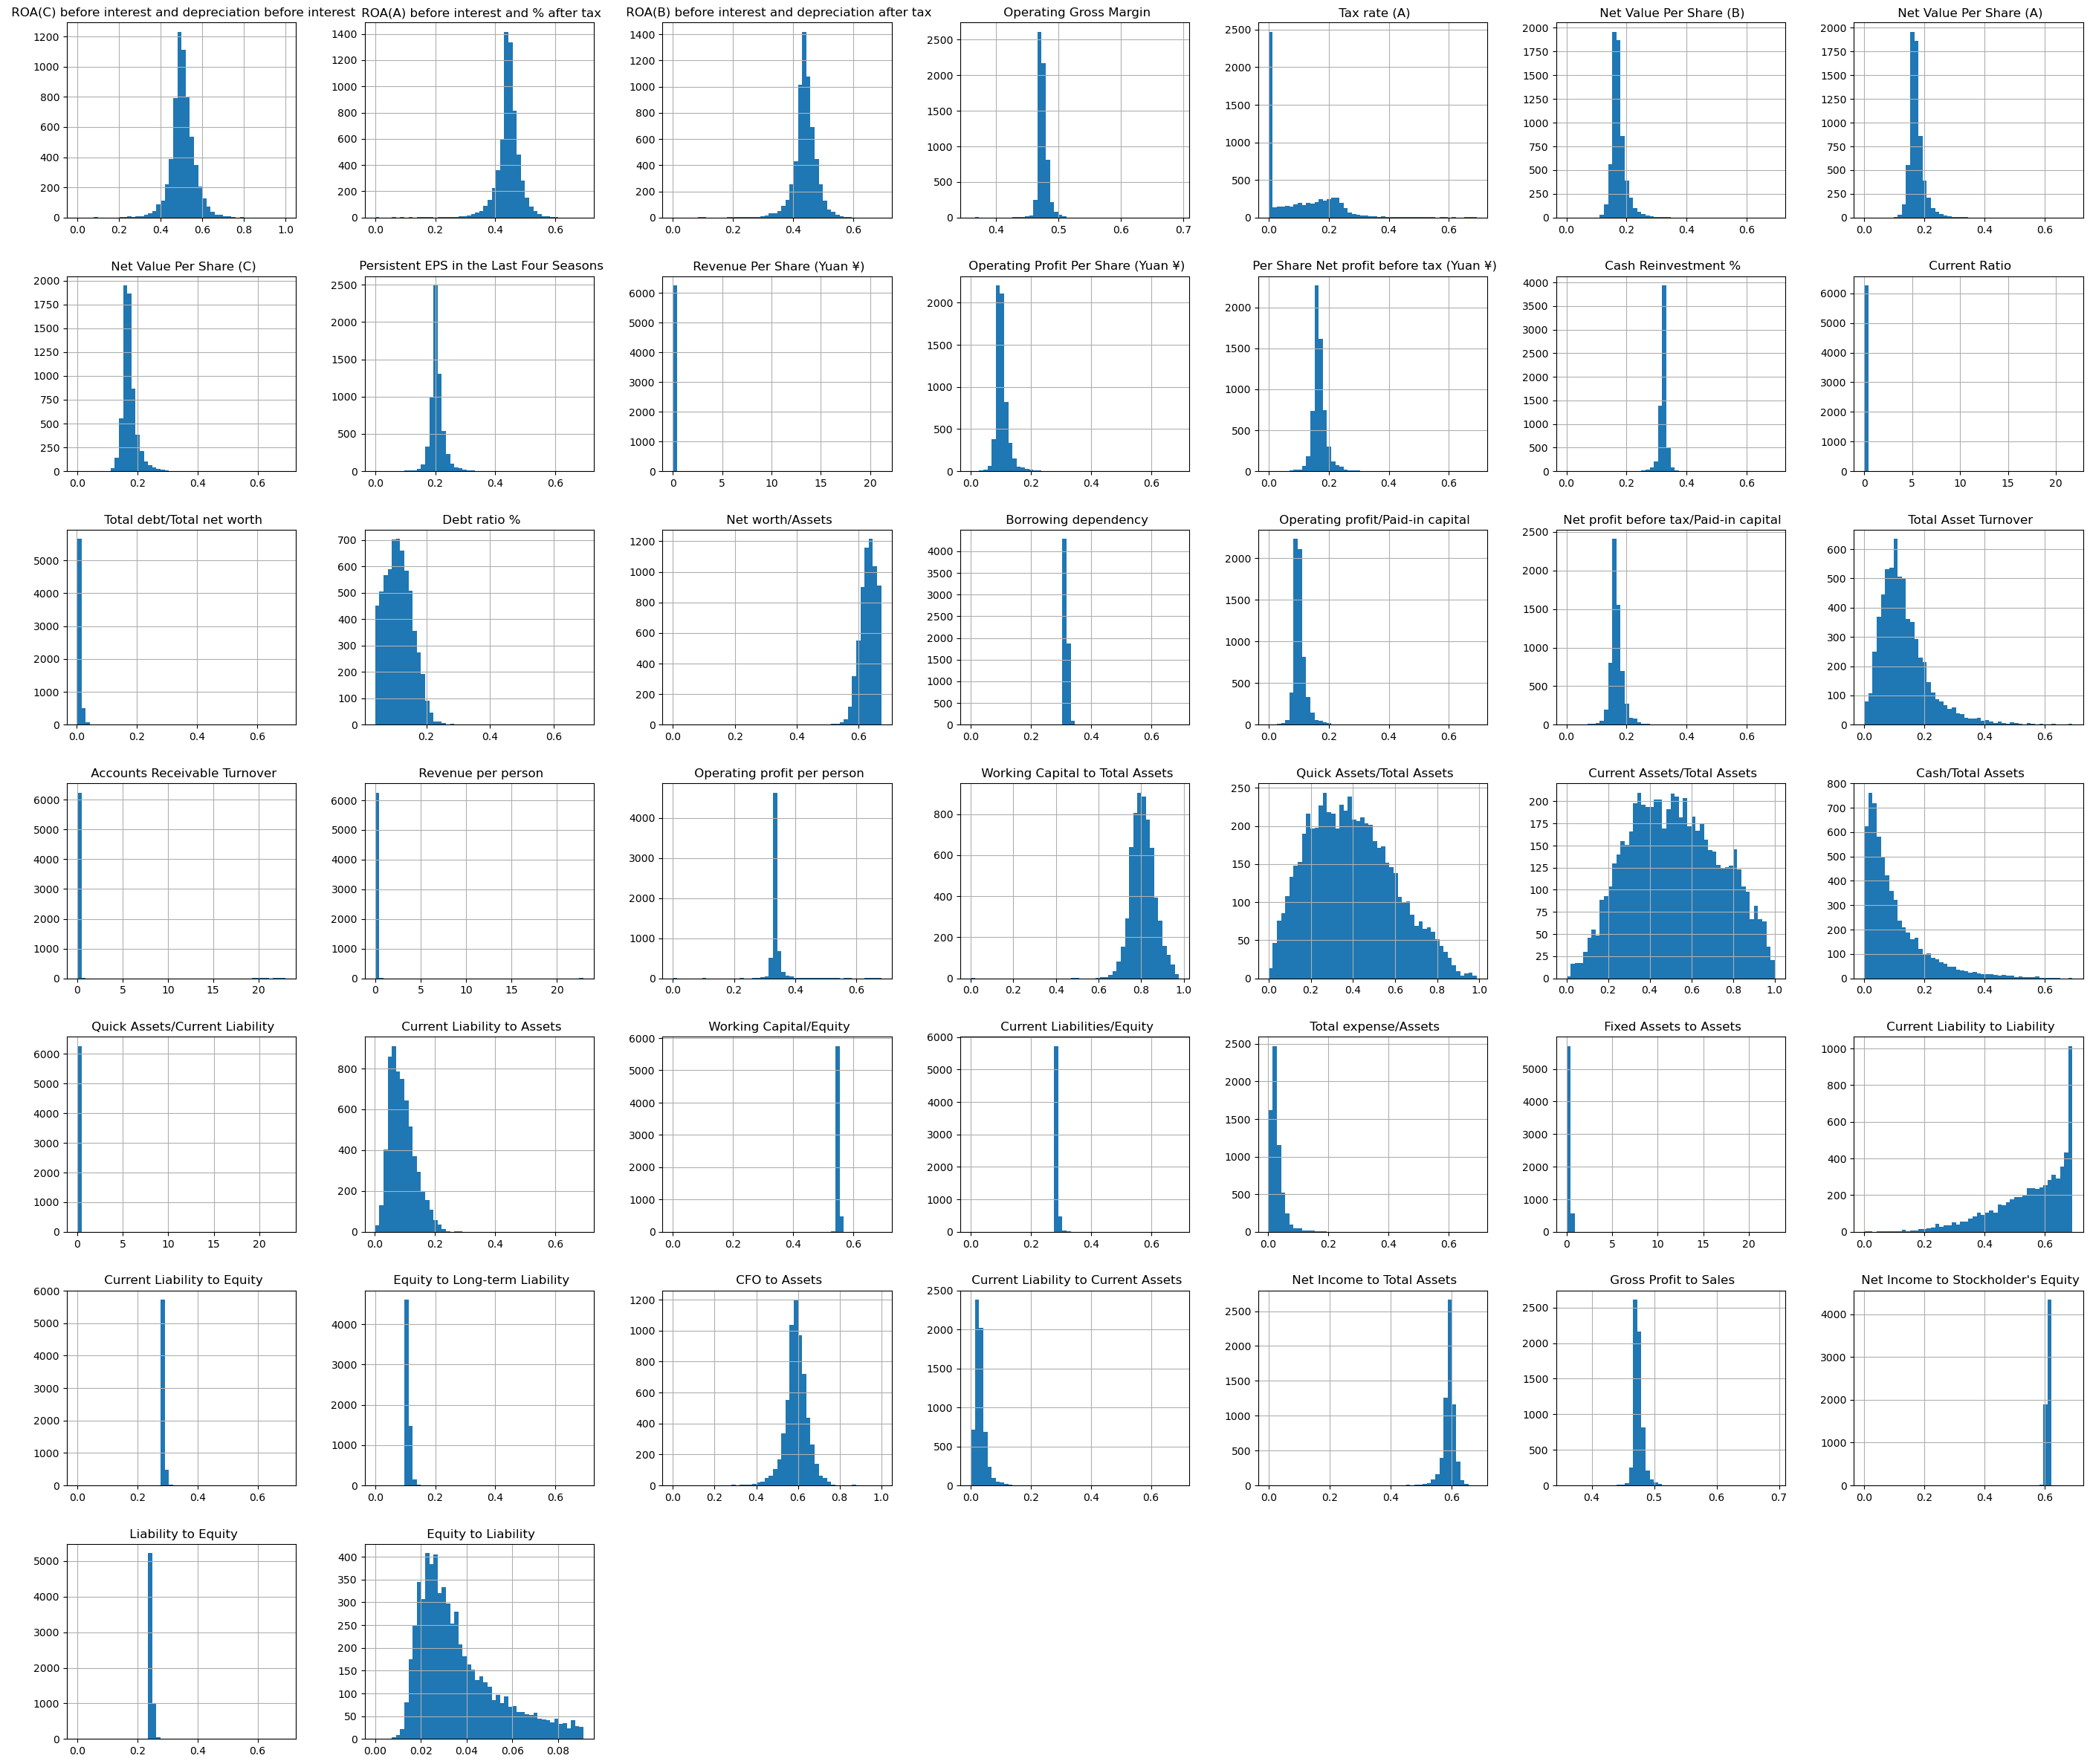

In [31]:
#visualizing new feature set
X_reduced.hist(figsize = (35,30),bins = 50)
plt.show()

In [32]:
#making train test split for modeling
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = .3, random_state = 42, stratify = y)

In [33]:
#checking to make sure that split happened correctly
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Revenue Per Share (Yuan ¥),...,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,CFO to Assets,Current Liability to Current Assets,Net Income to Total Assets,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Equity to Liability
5346,0.453274,0.416345,0.408192,0.470419,0.000000,0.171120,0.171120,0.171120,0.189434,0.024044,...,0.670349,0.285360,0.105287,0.582023,0.027460,0.580181,0.470417,0.609422,0.245435,0.037222
476,0.446887,0.422152,0.405412,0.470162,0.000000,0.153892,0.153892,0.153892,0.186300,0.019011,...,0.352724,0.286146,0.127217,0.548350,0.021863,0.580938,0.470161,0.609281,0.250285,0.020000
2497,0.656267,0.551421,0.540739,0.499203,0.041150,0.200583,0.200583,0.200583,0.265987,0.002794,...,0.304689,0.283033,0.110141,0.580696,0.070109,0.639685,0.499201,0.613106,0.244425,0.052715
6333,0.430312,0.402080,0.392117,0.468057,0.000000,0.154867,0.154867,0.154867,0.177789,0.097827,...,0.691588,0.296855,0.105200,0.347809,0.034519,0.574546,0.468057,0.608114,0.255159,0.016156
465,0.528982,0.459027,0.452846,0.474696,0.213235,0.173497,0.173497,0.173497,0.211408,0.064626,...,0.582311,0.285333,0.107646,0.625413,0.028955,0.601306,0.474694,0.610948,0.245965,0.032882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,0.604836,0.499433,0.493698,0.480454,0.203455,0.180346,0.180346,0.180346,0.233508,0.042028,...,0.571030,0.284878,0.107577,0.655664,0.023510,0.619577,0.480454,0.612189,0.245546,0.036177
1699,0.440745,0.387645,0.396412,0.467172,0.000000,0.151686,0.151686,0.151686,0.178343,0.018299,...,0.482541,0.285781,0.113613,0.524804,0.024494,0.564887,0.467171,0.608031,0.247444,0.025853
1377,0.558231,0.475088,0.464387,0.473458,0.241935,0.174594,0.174594,0.174594,0.231185,0.158323,...,0.605839,0.293288,0.114720,0.627406,0.035071,0.602947,0.473457,0.612282,0.253912,0.016822
4828,0.432604,0.398573,0.394682,0.471962,0.000000,0.150997,0.150997,0.150997,0.185594,0.011115,...,0.653188,0.285690,0.106083,0.570648,0.024449,0.571684,0.471960,0.608797,0.245836,0.033800


In [34]:
#making new primary components from the reduced feature set
scaler = StandardScaler()
base_pca = PCA(n_components= 12)
smote = BorderlineSMOTE(k_neighbors = 5, random_state=42)
X_tr_stand = scaler.fit_transform(X_train)
X_tr_smote, y_tr_smote = smote.fit_resample(X_tr_stand, y_train)
X_tr_pca = base_pca.fit_transform(X_tr_smote)
X_test_pca = base_pca.transform(X_test)

base_pca.components_

/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


array([[-1.70979052e-01, -1.93485138e-01, -1.85637876e-01,
        -6.80828861e-02, -5.66183177e-02, -1.04655626e-01,
        -1.04534711e-01, -1.04547707e-01, -1.46854542e-01,
        -2.90548694e-03, -1.03304773e-01, -1.37425344e-01,
        -1.06788568e-01, -2.62193571e-03,  2.46846037e-01,
         1.27220840e-01, -1.28286266e-01,  3.15081529e-01,
        -1.02355250e-01, -1.42632069e-01, -2.09277411e-02,
         1.88136194e-03, -3.29228593e-04, -5.81891416e-02,
        -1.00890134e-01, -3.00103842e-02, -1.51826691e-02,
        -4.98397041e-02, -1.55383902e-03,  1.08820323e-01,
        -1.65432739e-01,  3.23386660e-01,  1.26284081e-01,
         2.03798912e-02,  6.04754997e-03,  3.23386660e-01,
         1.50107688e-01, -7.63925739e-02,  8.58637705e-02,
        -2.13489457e-01, -6.80819848e-02, -3.23647056e-01,
         3.04114154e-01, -8.01483052e-02],
       [ 2.27959876e-01,  2.64224318e-01,  2.50801167e-01,
         1.16158683e-01,  8.23944846e-02,  1.42101450e-01,
         1.41

In [35]:
#making a dataframe out of the data points in primary component form
pca_trans_df = pd.DataFrame(X_tr_pca)
pca_trans_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.636287,0.046461,-1.455399,0.607604,-0.576940,-0.124494,-0.244459,-0.849314,-0.052779,-0.719357,0.867556,-0.130670
1,-0.164742,-0.386061,0.146685,-0.882797,-0.651346,-0.078244,-1.358324,-0.367167,-1.144857,2.000616,-0.146783,-0.508589
2,-6.445437,6.095064,1.759156,-1.409051,-2.054786,1.040885,0.618037,4.463323,-1.754800,-0.038474,-0.402104,-0.659856
3,2.680421,-1.313663,-2.755920,1.782549,4.491355,-4.095643,-5.158958,2.303333,-2.283907,-1.163371,-1.278161,0.736026
4,-3.100445,2.196901,-0.649524,0.320834,0.261647,0.299190,0.625721,0.052290,0.541879,-0.213395,-0.858649,0.362975
...,...,...,...,...,...,...,...,...,...,...,...,...
8467,0.553822,-0.611013,1.958020,-1.042443,-1.131051,0.492651,-0.581168,-0.259389,-0.142997,1.636630,-0.131222,-0.246948
8468,1.995246,-2.884580,1.567713,-0.445249,-2.005781,0.628418,0.152266,0.877645,0.363939,1.732025,0.684459,-0.575767
8469,0.692345,0.087548,0.668487,-0.936409,1.332152,-0.998094,0.068101,-0.048380,-0.628164,0.292210,1.402476,-1.103804
8470,3.870927,-2.367732,-1.365147,0.636859,1.443614,-0.422476,0.012959,-0.267944,-0.363107,1.443552,-0.116359,-0.236337


In [36]:
#checking to see if first primary component is able to be parsed well, its a mix of a bunch o different components
base_pca.components_[0]

array([-0.17097905, -0.19348514, -0.18563788, -0.06808289, -0.05661832,
       -0.10465563, -0.10453471, -0.10454771, -0.14685454, -0.00290549,
       -0.10330477, -0.13742534, -0.10678857, -0.00262194,  0.24684604,
        0.12722084, -0.12828627,  0.31508153, -0.10235525, -0.14263207,
       -0.02092774,  0.00188136, -0.00032923, -0.05818914, -0.10089013,
       -0.03001038, -0.01518267, -0.0498397 , -0.00155384,  0.10882032,
       -0.16543274,  0.32338666,  0.12628408,  0.02037989,  0.00604755,
        0.32338666,  0.15010769, -0.07639257,  0.08586377, -0.21348946,
       -0.06808198, -0.32364706,  0.30411415, -0.08014831])

In [37]:
#checking to see how much variance each component explains
base_pca.explained_variance_ratio_

array([0.36650014, 0.1918123 , 0.08502976, 0.06408   , 0.0482162 ,
       0.03840059, 0.02887256, 0.02378932, 0.02090891, 0.01666847,
       0.0133033 , 0.01142432])

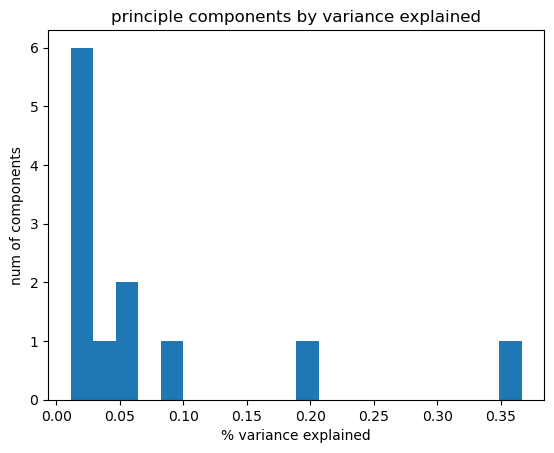

In [38]:
#visualizing variance explanation by primary component
pca_df = pd.DataFrame(base_pca.explained_variance_ratio_)
fig, ax = plt.subplots()
ax.hist(pca_df, bins = 20)
ax.set_title('principle components by variance explained')
ax.set_xlabel('% variance explained')
ax.set_ylabel('num of components')
#pca_df.hist(figsize = (10,8),bins = 25)
plt.show()

In [39]:
#baseline logreg model
steps = [('scaler', StandardScaler()),
         ('smote', BorderlineSMOTE(k_neighbors = 5, random_state = 42)),
         ('pca', PCA(n_components = 9)),
         ('logreg', LogisticRegression())]
log_pipe = ImPipeline(steps)
params = {'smote__k_neighbors': [3, 5, 10, 15, 20] ,
          'logreg__C': [.001, .01, .1]}
logreg_cv = GridSearchCV(estimator = log_pipe, param_grid = params, cv = 5)

In [40]:
#performing gridsearch and cross validation
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote',
                                        BorderlineSMOTE(random_state=42)),
                                       ('pca', PCA(n_components=9)),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.001, 0.01, 0.1],
                         'smote__k_neighbors': [3, 5, 10, 15, 20]})

In [41]:
#finding best acc score
logreg_cv.best_score_

0.8879068474791106

In [42]:
#finding best params
logreg_cv.best_params_

{'logreg__C': 0.1, 'smote__k_neighbors': 3}

In [43]:
#seeing how well it generalizes by training the whole thing
log_pipe.fit(X_train, y_train) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('smote', BorderlineSMOTE(random_state=42)),
                ('pca', PCA(n_components=9)),
                ('logreg', LogisticRegression())])

In [44]:
#extracting best model
best_logreg_model = logreg_cv.best_estimator_

In [45]:
#getting classification report for logreg model, paying most attention to recall score as we would rather be safe than sorry here
y_rfc_pred = best_logreg_model.predict(X_test)
print(classification_report(y_test, y_rfc_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1816
           1       0.21      0.82      0.33        65

    accuracy                           0.88      1881
   macro avg       0.60      0.85      0.63      1881
weighted avg       0.97      0.88      0.92      1881



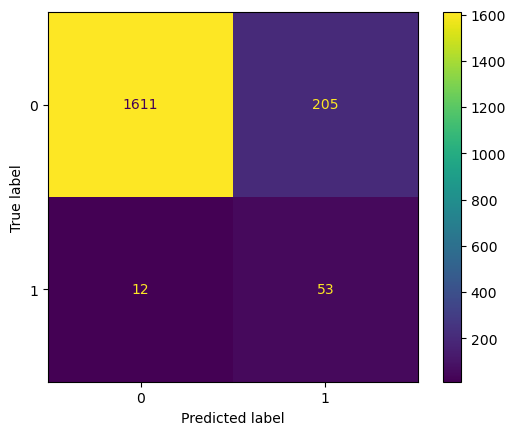

In [46]:
#plotting confusion matrix
ConfusionMatrixDisplay.from_estimator(best_logreg_model, X_test, y_test);

In [47]:
#scoring the best model
log_pipe.score(X_train,y_train)

0.8883572567783095

In [48]:
#scoring on test set, looks good at least in terms of no data leakage
log_pipe.score(X_test,y_test)

0.8883572567783095

In [49]:
#looks decent for a baseline PCA logreg model, but def some work to be done, next lets try a random forest

In [50]:
#making random forest
bag_class_decision = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 150)
steps = [('scaler', StandardScaler()),
         ('smote', BorderlineSMOTE(k_neighbors = 5, random_state = 42)),
         ('pca', PCA(n_components = 9)),
         ('dtc', bag_class_decision)]
rfc_pipe = ImPipeline(steps)
params = {'dtc__base_estimator__max_depth': np.arange(2,6,2)}
rfc_cv = GridSearchCV(scoring = 'recall', estimator = rfc_pipe, param_grid = params, cv = 5)


In [51]:
#performing gridsearch and cross validation
rfc_cv.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-pack

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote',
                                        BorderlineSMOTE(random_state=42)),
                                       ('pca', PCA(n_components=9)),
                                       ('dtc',
                                        BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                          n_estimators=150))]),
             param_grid={'dtc__base_estimator__max_depth': array([2, 4])},
             scoring='recall')

In [52]:
#finding best max depth
rfc_cv.best_params_

{'dtc__base_estimator__max_depth': 2}

In [53]:
#assigning best model
rfc_best = rfc_cv.best_estimator_

In [54]:
#fitting best model
rfc_best.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('smote', BorderlineSMOTE(random_state=42)),
                ('pca', PCA(n_components=9)),
                ('dtc',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                   n_estimators=150))])

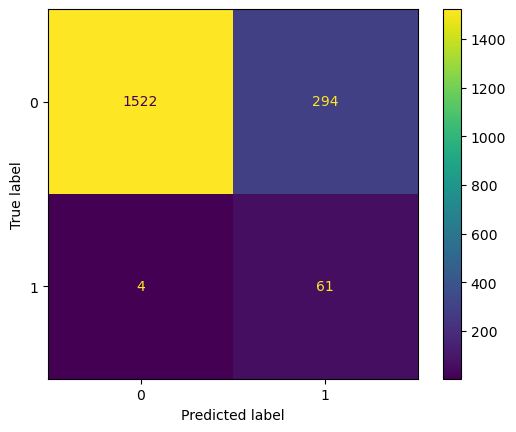

In [55]:
#plotting confusion matrix
ConfusionMatrixDisplay.from_estimator(rfc_best, X_test, y_test);

In [56]:
#printing classification report
y_rfc_pred = rfc_best.predict(X_test)
print(classification_report(y_test, y_rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1816
           1       0.17      0.94      0.29        65

    accuracy                           0.84      1881
   macro avg       0.58      0.89      0.60      1881
weighted avg       0.97      0.84      0.89      1881



In [ ]:
#thats what im talking about, 94% on class 1 recall is amazing and a 100 percent precision on type 0 means we can be confident in our class 0
#assignments

In [57]:
#XG boosting time

In [58]:
#making 
params = {'xgb__max_depth': [3, 4, 5], 'xgb__learning_rate': [.01, .1],
          'xgb__reg_alpha': [0, .25, .5], 'xgb__reg_lambda': [0, .25, .5], 'xgb__n_estimators': [100], 'xgb__colsample_bytree': [.5]}

In [59]:
steps = [('smote', BorderlineSMOTE(k_neighbors = 5, random_state = 42)),
         ('pca',  PCA(n_components = 9)),
         ('xgb', XGBClassifier('reg:squarederror'))]
xgb_pipe = ImPipeline(steps)
xgb_cv = GridSearchCV(estimator = xgb_pipe, scoring = 'recall', param_grid = params, cv = 5)

/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/xgboost/core.py:727: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


In [60]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote',
                                        BorderlineSMOTE(random_state=42)),
                                       ('pca', PCA(n_components=9)),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gam...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='reg:squarederror', ...))]),
             param_grid={'xgb__colsample_bytree': [0.5],
                         'xgb__learning_rate': [0.01, 0.1],
                         'xgb__max_depth': [3, 4, 5],
                         'xgb__n_estimators': [100],
                         'xgb__reg_alpha': [0, 0.25, 0.5],
                         'xgb__reg_lambda': [0, 0.25, 0.5]},
             scoring='recall')

In [61]:
xgb_cv.best_params_

{'xgb__colsample_bytree': 0.5,
 'xgb__learning_rate': 0.01,
 'xgb__max_depth': 3,
 'xgb__n_estimators': 100,
 'xgb__reg_alpha': 0,
 'xgb__reg_lambda': 0}

In [62]:
xgb_best = xgb_cv.best_estimator_

In [63]:
xgb_best.fit(X_train, y_train)

Pipeline(steps=[('smote', BorderlineSMOTE(random_state=42)),
                ('pca', PCA(n_components=9)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.5, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None,
                               objective='reg:squarederror', ...))])

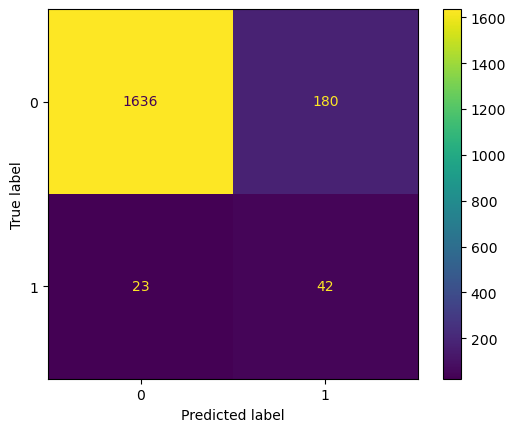

In [64]:
ConfusionMatrixDisplay.from_estimator(xgb_best, X_test, y_test);

In [65]:
y_xgb_pred = xgb_best.predict(X_test)
print(classification_report(y_test, y_xgb_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1816
           1       0.19      0.65      0.29        65

    accuracy                           0.89      1881
   macro avg       0.59      0.77      0.62      1881
weighted avg       0.96      0.89      0.92      1881



In [66]:
#finally lets try a neural network

In [70]:
def create_nn():
    nn_model = Sequential()
    nn_model.add(Dense(8472, input_dim=9, activation='relu', kernel_regularizer = L2(.01)))
    nn_model.add(Dense(20, activation='relu', kernel_regularizer = L1(.005)))
    nn_model.add(Dense(10, activation='relu', kernel_regularizer = L1(.005)))
    nn_model.add(Dense(10, activation='relu', kernel_regularizer = L1(.005)))
    nn_model.add(Dense(units=1, activation='sigmoid'))
    opt = Adam(learning_rate = 0.01, beta_1 = 0.9, beta_2 = 0.999)
    nn_model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy', 'AUC'])
    return nn_model
nn_class = KerasClassifier(build_fn = create_nn, epochs = 100, batch_size = 32, verbose = 1)

/var/folders/wq/4pbqhwns4pg_cmgzb1t39xdr0000gn/T/ipykernel_11883/1064522910.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_class = KerasClassifier(build_fn = create_nn, epochs = 100, batch_size = 32, verbose = 1)


In [71]:
steps = [('scaler', StandardScaler()),
         ('smote', BorderlineSMOTE(k_neighbors = 5, random_state = 42)),
         ('pca', PCA(n_components = 9)),
         ('nn', nn_class)]
nn_pipe = ImPipeline(steps)


In [72]:
nn_pipe.fit(X_train, y_train)

Epoch 1/100


2024-02-15 22:11:44.683768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc

265/265 [==============================] - 7s 20ms/step - loss: 1.6766 - accuracy: 0.9132 - auc: 0.9542
Epoch 2/100
  1/265 [..............................] - ETA: 4s - loss: 1.3962 - accuracy: 0.8125 - auc: 0.9961

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x24x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x24x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceSh

265/265 [==============================] - 5s 18ms/step - loss: 1.2710 - accuracy: 0.9248 - auc: 0.9620
Epoch 3/100
265/265 [==============================] - 5s 18ms/step - loss: 1.2540 - accuracy: 0.9278 - auc: 0.9636
Epoch 4/100
265/265 [==============================] - 5s 19ms/step - loss: 1.2449 - accuracy: 0.9307 - auc: 0.9633
Epoch 5/100
265/265 [==============================] - 5s 18ms/step - loss: 1.2395 - accuracy: 0.9335 - auc: 0.9638
Epoch 6/100
265/265 [==============================] - 5s 19ms/step - loss: 1.2354 - accuracy: 0.9346 - auc: 0.9637
Epoch 7/100
265/265 [==============================] - 5s 19ms/step - loss: 1.2288 - accuracy: 0.9341 - auc: 0.9661
Epoch 8/100
265/265 [==============================] - 5s 18ms/step - loss: 1.2319 - accuracy: 0.9324 - auc: 0.9648
Epoch 9/100
265/265 [==============================] - 5s 19ms/step - loss: 1.2287 - accuracy: 0.9365 - auc: 0.9651
Epoch 10/100
265/265 [==============================] - 5s 19ms/step - loss: 1.2298 

Pipeline(steps=[('scaler', StandardScaler()),
                ('smote', BorderlineSMOTE(random_state=42)),
                ('pca', PCA(n_components=9)),
                ('nn',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x16b6a2cd0>)])

In [73]:
y_proba = nn_pipe.predict(X_test)

34/59 [================>.............] - ETA: 0s

2024-02-15 22:19:55.782727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


59/59 [==============================] - 0s 4ms/step


In [74]:
y_pred = (y_proba > 0.5).astype('int')

In [75]:
y_nn_pred = nn_pipe.predict(X_test)
print(classification_report(y_test, y_nn_pred))

59/59 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1816
           1       0.22      0.80      0.35        65

    accuracy                           0.90      1881
   macro avg       0.61      0.85      0.65      1881
weighted avg       0.97      0.90      0.92      1881

